<a href="https://colab.research.google.com/github/rainforest01-coder/ESAA_files/blob/main/ESAA_WEEK4_02%EC%82%AC%EC%9D%B4%ED%82%B7%EB%9F%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##05 데이터 전처리

데이터 처리 기본사항
* 결손값(NaN,Null) 허용 안됨 > 해당 피처 드롭 또는 평균값으로 대체
* 모든 문자열 값은 인코딩되어 숫자형으로 변환해야함
  * 카테고리형 피처: 코드값으로 표현
  * 텍스트형 피처: 피처 벡터화 또는 삭제

###데이터 인코딩

1. 레이블 인코딩

> 카테고리 피처를 코드형 숫자 값으로 변환

단점: 숫자값의 경우 크고 작음에 대한 특성이 작용

In [2]:
from sklearn.preprocessing import LabelEncoder
items=['TV','냉장고','전자레인지','컴퓨터','선풍기','믹서','믹서']
encoder=LabelEncoder()
encoder.fit(items)
labels=encoder.transform(items)
print('인코딩 변환값: ',labels)

인코딩 변환값:  [0 1 4 5 3 2 2]


In [4]:
print('인코딩 클래스: ',encoder.classes_)

인코딩 클래스:  ['TV' '냉장고' '믹서' '선풍기' '전자레인지' '컴퓨터']


In [6]:
print('디코딩 원본값',encoder.inverse_transform([4,5,2,0,1,1,3,3]))

디코딩 원본값 ['전자레인지' '컴퓨터' '믹서' 'TV' '냉장고' '냉장고' '선풍기' '선풍기']


2. 원-핫 인코딩

피처 값의 유형에 따라 새로운 피처를 추가해 고유 값에 해당하는 칼럼에만 1을 표시하고 나머지 칼럼에는 0을 표시하는 방식

In [8]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np
items=['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']

#2차원으로
items=np.array(items).reshape(-1,1)
oh_encoder=OneHotEncoder()
oh_encoder.fit(items)
oh_labels=oh_encoder.transform(items)

#OneHotEncoder결과는 희소 행렬이므로 toarray()를 이용해 밀집 행렬로 변환.
#희소행렬: 0이 아닌 값과 위치 정보만 저장해 메모리 낭비를 줄임
print('원-핫 인코딩 데이터')
print(oh_labels.toarray())
print('원-핫 인코딩 데이터 차원')
print(oh_labels.shape)

원-핫 인코딩 데이터
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
원-핫 인코딩 데이터 차원
(8, 6)


판다스에 원-핫 인코딩을 더 쉽게 지원하는 API있음:get_dummies()

In [12]:
import pandas as pd
df=pd.DataFrame({'item':['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']})
pd.get_dummies(df,dtype=int)

,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자레인지,item_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


###피처 스케일링과 정규화

서로 다른 변수 값의 범위를 일정한 수준으로 맞추는 작업
1. 표준화
데이터의 피처 각각이 평균 0, 분산1인 가우시안 정규 분포를 가진 값으로 변환하는 것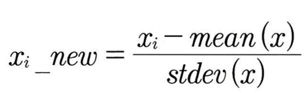
2. 정규화

서로 다른 피처의 크기를 통일하기 우해 변환해주는 개념, 즉 개별 데이터를 0-1사이 값으로 변환해 같은 단위로 변경하는 것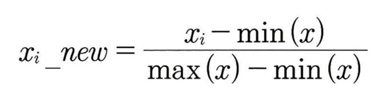

*사이킷런 전처리에서 제공하는 Normalizer모듈(벡터 정규화)과 일반적인 정규화의 차이: 개별벡터를 모든 피처 벡터의 크기로 나눠줌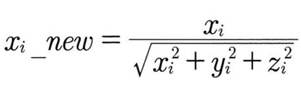

###StandardScaler

표준화를 쉽게 지원하기 위한 클래스
즉 개별 피처를 평균0, 분산1로 변환

>서포트 벡터 머신, 선형 회귀, 로지스틱 회귀 등의 알고리즘은 데이터가 가우시안 분포라는 가정하에 구현됐기에 표준화 중요

In [13]:
from sklearn.datasets import load_iris
import pandas as pd
iris=load_iris()
iris_data=iris.data
iris_df=pd.DataFrame(data=iris_data,columns=iris.feature_names)
print('feature들의 평균 값')
print(iris_df.mean())
print('\n feature들의 분산 값')
print(iris_df.var())

feature들의 평균 값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

 feature들의 분산 값
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


In [14]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(iris_df)
iris_scaled=scaler.transform(iris_df)

#transform()시 스케일 변환된 데이터 세트가 numpy ndarray로 반환되므로 DF로 변환
iris_df_scaled=pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature들의 평균 값')
print(iris_df_scaled.mean())
print('\nfeature들의 분산 값')
print(iris_df_scaled.var())


feature들의 평균 값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

feature들의 분산 값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


###학습 데이터와 테스트 데이터의 스케일링 변환 시 유의점

fit(): 데이터 변환을 위한 기준 정보 설정 적용
transform():설정된 정보를 이용해 데이터 변환
fit_transform(): 이를 한번에 적용

**이때 학습 데이터 세트에 사용한 fit()을 그대로 테스트 데이터에 적용해야함**

In [15]:
#문제가 생기는 경우
from sklearn.preprocessing  import MinMaxScaler
import numpy as np

train_array=np.arange(0,11).reshape(-1,1)
test_array=np.arange(0,6).reshape(-1,1)

scaler=MinMaxScaler()
scaler.fit(train_array)
train_scaled=scaler.transform(train_array)
print('원본 train_arry데이터:',np.round(train_array.reshape(-1),2))
print('Scale된 train_array데이터: ',np.round(train_scaled.reshape(-1),2))

원본 train_arry데이터: [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_array데이터:  [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [17]:
scaler.fit(test_array)
test_scaled=scaler.transform(test_array)
print('원본 test_array데이터: ',np.round(test_array.reshape(-1),2))
print('Scale된 test_array 데이터: ',np.round(test_scaled.reshape(-1),2))

원본 test_array데이터:  [0 1 2 3 4 5]
Scale된 test_array 데이터:  [0.  0.2 0.4 0.6 0.8 1. ]


서로 다른 원본값이 같은 값으로 변환되는 결과 초래
테스트데이터는 학습 데이터의 스케일링 기준에 따라야 하며 테스트 데이터의 1값은 학습 데이터와 동일하게 0.1값으로 변환되어야함

In [18]:
scaler=MinMaxScaler()
scaler.fit(train_array)
train_scaled=scaler.transform(train_array)
print('원본 train_array데이터:',np.round(train_array.reshape(-1),2))
print('Scale된 train_array데이터: ',np.round(train_scaled.reshape(-1),2))

test_scaled=scaler.transform(test_array)
print('원본 test_array데이터: ',np.round(test_array.reshape(-1),2))
print('Scale된 test_array 데이터: ',np.round(test_scaled.reshape(-1),2))

원본 train_array데이터: [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_array데이터:  [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
원본 test_array데이터:  [0 1 2 3 4 5]
Scale된 test_array 데이터:  [0.  0.1 0.2 0.3 0.4 0.5]


fit_transform(): 테스트 데이터에 사용불가, 전체 데이터세트에 스케일링 적용한 뒤 분리하는 것이 바람직함

##사이킷런으로 수행하는 타이타닉 생존자 예측

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
titanic_df=pd.read_csv('/content/drive/MyDrive/ESAA/week4/titanic_train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [22]:
print('\n ###학습 데이터 정보###\n')
print(titanic_df.info())


 ###학습 데이터 정보###

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [23]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(),inplace=True)
titanic_df['Cabin'].fillna('N',inplace=True)
titanic_df['Embarked'].fillna('N',inplace=True)
print('데이터 세트 Null값 개수',titanic_df.isnull().sum().sum())

데이터 세트 Null값 개수 0


/tmp/ipython-input-2168752985.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Age'].fillna(titanic_df['Age'].mean(),inplace=True)
/tmp/ipython-input-2168752985.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace

문자열 피처들의 분류 살펴보기

In [25]:
print('sex값 분포: \n',titanic_df['Sex'].value_counts())
print('\ncabin값 분포: \n',titanic_df['Cabin'].value_counts())
print('\nembarked값 분포: \n',titanic_df['Embarked'].value_counts())

sex값 분포: 
 Sex
male      577
female    314
Name: count, dtype: int64

cabin값 분포: 
 Cabin
N              687
G6               4
C23 C25 C27      4
B96 B98          4
F2               3
              ... 
E17              1
A24              1
C50              1
B42              1
C148             1
Name: count, Length: 148, dtype: int64

embarked값 분포: 
 Embarked
S    644
C    168
Q     77
N      2
Name: count, dtype: int64


cabin의 경우 속성 정리 필요: 앞글자만 추출

In [27]:
titanic_df['Cabin']=titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'].head(3))

0    N
1    C
2    N
Name: Cabin, dtype: object


성별에 따른 생존자 수 비교

In [28]:
titanic_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

여성 74.2%생존, 남성 18.8%생존

시각화

<Axes: xlabel='Sex', ylabel='Survived'>

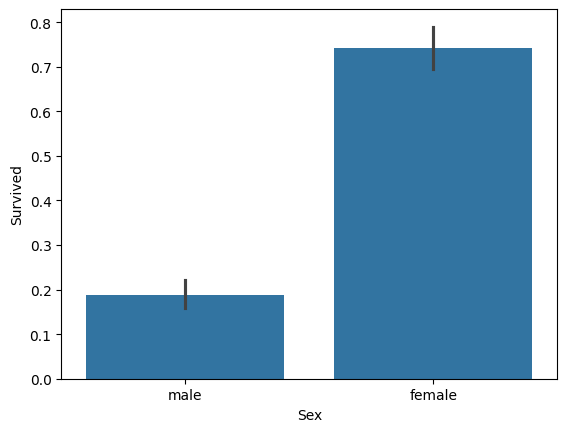

In [29]:
sns.barplot(x='Sex',y='Survived',data=titanic_df)

<Axes: xlabel='Pclass', ylabel='Survived'>

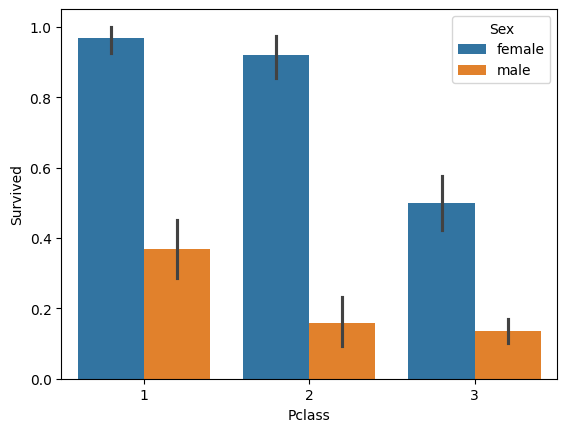

In [30]:
#부자와 가난한 사람
sns.barplot(x='Pclass',y='Survived',hue='Sex',data=titanic_df)

age에 따른 생존 확률

카테고리 할당

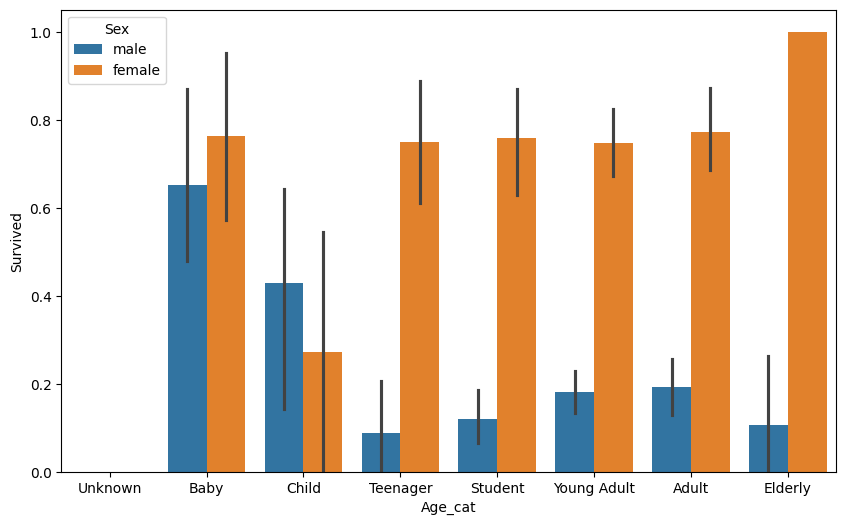

In [33]:
def get_category(age):
  cat=''
  if age<=-1: cat='Unknown'
  elif age <=5: cat='Baby'
  elif age <=12: cat='Child'
  elif age <=18: cat='Teenager'
  elif age <=25: cat='Student'
  elif age <=35: cat='Young Adult'
  elif age <=60: cat='Adult'
  else: cat='Elderly'
  return cat
plt.figure(figsize=(10,6))
group_names=['Unknown','Baby','Child','Teenager','Student','Young Adult','Adult','Elderly']
titanic_df['Age_cat']=titanic_df['Age'].apply(lambda x: get_category(x))
sns.barplot(x='Age_cat',y='Survived',hue='Sex',data=titanic_df,order=group_names)
titanic_df.drop('Age_cat',axis=1,inplace=True)

baby생존확률 비교적 높고 child는 낮음, elderly는 매우 생존확률 높음

sex,age,pclass등이 중요하게 생존을 좌우하는 피처임을 확인

남은 카테고리 피처를 숫자형 카테고리로 변환

In [34]:
from sklearn.preprocessing import LabelEncoder
def encode_features(dataDF):
  features=['Cabin','Sex','Embarked']
  for feature in features:
    le=LabelEncoder()
    le=le.fit(dataDF[feature])
    dataDF[feature]=le.transform(dataDF[feature])
  return dataDF
titanic_df=encode_features(titanic_df)
titanic_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


In [48]:
#Null처리 함수
def fillna(df):
  df['Age'].fillna(df['Age'].mean(),inplace=True)
  df['Cabin'].fillna('N',inplace=True)
  df['Embarked'].fillna('N',inplace=True)
  df['Fare'].fillna(0,inplace=True)
  return df
#불필요한 피처 제거
def drop_features(df):
  df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
  return df
#레이블 인코딩 수행
def format_features(df):
  df['Cabin']=df['Cabin'].str[:1]
  features=['Cabin','Sex','Embarked']
  for feature in features:
    le=LabelEncoder()
    le=le.fit(df[feature])
    df[feature]=le.transform(df[feature])
  return df

  #앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
  df=fillna(df)
  df=drop_features(df)
  df=format_features(df)
  return df

In [49]:
titanic_df=pd.read_csv('/content/drive/MyDrive/ESAA/week4/titanic_train.csv')
y_titanic_df=titanic_df['Survived']
X_titanic_df=titanic_df.drop('Survived',axis=1)
X_titanic_df=transform_features(X_titanic_df)
X_titanic_df

/tmp/ipython-input-3787972540.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace=True)
/tmp/ipython-input-3787972540.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,22.000000,1,0,7.2500,7,3
1,1,0,38.000000,1,0,71.2833,2,0
2,3,0,26.000000,0,0,7.9250,7,3
3,1,0,35.000000,1,0,53.1000,2,3
4,3,1,35.000000,0,0,8.0500,7,3
...,...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,7,3
887,1,0,19.000000,0,0,30.0000,1,3
888,3,0,29.699118,1,2,23.4500,7,3
889,1,1,26.000000,0,0,30.0000,2,0


In [50]:
from sklearn. model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_titanic_df, y_titanic_df,test_size=0.2,random_state=11)

In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

dt_clf=DecisionTreeClassifier()
rf_clf=RandomForestClassifier()
lr_clf=LogisticRegression()

dt_clf.fit(X_train,y_train)
rf_clf.fit(X_train,y_train)
lr_clf.fit(X_train,y_train)

dt_pred=dt_clf.predict(X_test)
rf_pred=rf_clf.predict(X_test)
lr_pred=lr_clf.predict(X_test)

print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test,dt_pred)))
print('RandomFroestClassifief 정확도: {0:.4f}'.format(accuracy_score(y_test,rf_pred)))
print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test,lr_pred)))

DecisionTreeClassifier 정확도: 0.7877
RandomFroestClassifief 정확도: 0.8603
LogisticRegression 정확도: 0.8492


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [52]:
#교차검증
from sklearn.model_selection import KFold

def exec_kfold(clf,folds=5):
  kfold=KFold(n_splits=folds)
  scores=[]

  for iter_count, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
    X_train, X_test=X_titanic_df.values[train_index], X_titanic_df.values[test_index]
    y_train, y_test=y_titanic_df.values[train_index], y_titanic_df.values[test_index]

    clf.fit(X_train, y_train)
    predictions=clf.predict(X_test)
    accuracy=accuracy_score(y_test, predictions)
    scores.append(accuracy)
    print("교차검증 {0} 정확도: {1:.4f}".format(iter_count,accuracy))
  mean_score=np.mean(scores)
  print('평균 정확도: {0:.4f}'.format(mean_score))
exec_kfold(dt_clf,folds=5)

교차검증 0 정확도: 0.7598
교차검증 1 정확도: 0.7697
교차검증 2 정확도: 0.7865
교차검증 3 정확도: 0.7640
교차검증 4 정확도: 0.8258
평균 정확도: 0.7812


In [54]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(dt_clf,X_titanic_df,y_titanic_df,cv=5)
for iter_count, accuracy in enumerate(scores):
  print('교차 검증 {0} 정확도 :{1:.4f}'.format(iter_count,accuracy))
print('평균정확도: {0:.4f}'.format(np.mean(scores)))


교차 검증 0 정확도 :0.7486
교차 검증 1 정확도 :0.7809
교차 검증 2 정확도 :0.7865
교차 검증 3 정확도 :0.7809
교차 검증 4 정확도 :0.8258
평균정확도: 0.7846


In [56]:
from sklearn.model_selection import GridSearchCV

parameters={'max_depth': [2,3,5,10],'min_samples_split':[2,3,5],'min_samples_leaf':[1,5,8]}
grid_dclf=GridSearchCV(dt_clf,param_grid=parameters,scoring='accuracy',cv=5)
grid_dclf.fit(X_train,y_train)
print('GridSearchCV최적 하이퍼 파라미터:',grid_dclf.best_params_)
print('GridSearchCV최고 정확도: {0:.4f}'.format(grid_dclf.best_score_))
best_dclf=grid_dclf.best_estimator_
dpredictions=best_dclf.predict(X_test)
accuracy=accuracy_score(y_test,dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier정확도: {0:.4f}'.format(accuracy))


GridSearchCV최적 하이퍼 파라미터: {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV최고 정확도: 0.7992
테스트 세트에서의 DecisionTreeClassifier정확도: 0.8715
